<a href="https://colab.research.google.com/github/Huzaifa3242/Deep-Learning-Practice/blob/main/ANN_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("fmnist_small.csv")

In [3]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


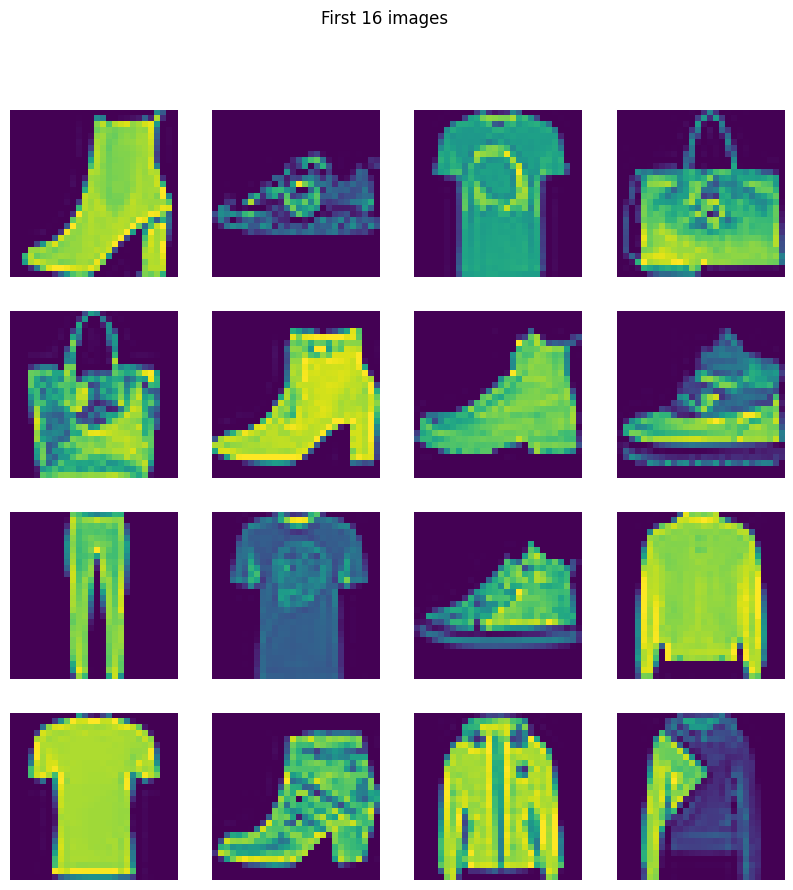

In [9]:
# seeing the data
import matplotlib.pyplot as plt
fig ,axes=plt.subplots(4,4,figsize=(10,10))
plt.suptitle("First 16 images")
for i ,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis("off")
plt.show()

In [10]:
# splitting data
X=df.iloc[:,1:].values
Y=df.iloc[:,0].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [12]:
#Scaling our data
X_train=X_train/255
X_test=X_test/255

In [14]:
# craeting dataset claases
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [35]:
class dataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype= torch.long)
  def __len__(self):
    return self.features.shape[0]
  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [36]:
train_data=dataset(X_train,Y_train)

In [37]:
train_data[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [38]:
test_data=dataset(X_test,Y_test)

In [39]:
len(test_data)

1200

In [40]:
# dataloader
train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False)

In [41]:
# buikding the model
class MyANN(nn.Module):
  def __init__(self,num_features):

    super().__init__()

    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,features):
    return self.model(features)

In [42]:
epochs=50
learning_rate=0.1

In [43]:
# Model
model=MyANN(X_train.shape[1])
# Loss func
criteria=nn.CrossEntropyLoss()

# Optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [45]:
#training loop
for epoch in range(epochs):
  total_loss=0
  for batch_features,batch_labels in train_loader:
    # forward pass
    output=model(batch_features)
    # loss calculate
    loss=criteria(output,batch_labels)
    # back propagation
    optimizer.zero_grad()
    loss.backward()
    # update params
    optimizer.step()
    total_loss = total_loss + loss.item()
  avg_loss = total_loss/len(train_loader)
  print(f"Epoch:{epoch+1} , Loss:{avg_loss}")

Epoch:1 , Loss:0.10135047607123852
Epoch:2 , Loss:0.08671649519043664
Epoch:3 , Loss:0.09429894739141066
Epoch:4 , Loss:0.08593553372348349
Epoch:5 , Loss:0.09104794457244376
Epoch:6 , Loss:0.08292255194857717
Epoch:7 , Loss:0.07396793643400694
Epoch:8 , Loss:0.07378655158604185
Epoch:9 , Loss:0.07452541520198186
Epoch:10 , Loss:0.0702875971266379
Epoch:11 , Loss:0.07221260443485032
Epoch:12 , Loss:0.0678096933872439
Epoch:13 , Loss:0.05961130707990378
Epoch:14 , Loss:0.06225900834503894
Epoch:15 , Loss:0.0638735295025011
Epoch:16 , Loss:0.07164644515297065
Epoch:17 , Loss:0.05186177882521103
Epoch:18 , Loss:0.08490670786549648
Epoch:19 , Loss:0.06167649261498203
Epoch:20 , Loss:0.04735807170315335
Epoch:21 , Loss:0.038994691617942105
Epoch:22 , Loss:0.05057426044717431
Epoch:23 , Loss:0.04087494502697761
Epoch:24 , Loss:0.02770121467843031
Epoch:25 , Loss:0.044251486298938596
Epoch:26 , Loss:0.05906712245584155
Epoch:27 , Loss:0.029444970831585426
Epoch:28 , Loss:0.02608340005526164
E

In [46]:
model.eval()

MyANN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [54]:
# Evaluation loop
correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        outputs = model(batch_features)
        # Get predicted class labels
        _, predicted_labels = torch.max(outputs, 1)

        # Update counts
        total_samples += batch_labels.size(0)
        correct_predictions += (predicted_labels == batch_labels).sum().item()

# Calculate accuracy
accuracy = 100 * correct_predictions / total_samples
print(f"Accuracy on the test set: {accuracy:.2f}%")


Accuracy on the test set: 84.42%
